In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Set variables below accordingly
root_folder = Path("/Users/amirreza/workspace/tff_virtual/results") 

dataset_names = ["femnist 20 epochs", "har", "mnist", "pminst", "shakespeare", "vsn"]
folders = {"femnist_K100_C10_E20": ["femnist_fedprox_K100_C10_E20_g20201013-184928_4_0_e20201013-184953", 
                                     "femnist_fedprox_K100_C10_E20_g20201013-184928_6_0_e20201013-185124",
                                     "femnist_virtual_natural_K100_C10_E20_g20201010-194222_5_0_e20201010-194302",
                                     "femnist_virtual_natural_K100_C10_E20_g20201013-161600_2_0_e20201013-164722"],
           "femnist_K100_C10_E100": ["femnist_fedprox_K100_C10_E100_g20201011-175913_21_0_e20201011-180339", 
                                     "femnist_fedprox_K100_C10_E100_g20201011-175913_29_0_e20201011-180548",
                                     "femnist_virtual_natural_K100_C10_E100_g20201011-174008_0_0_e20201011-174036",
                                     "femnist_virtual_natural_K100_C10_E100_g20201014-002954_1_0_e20201014-003024"],
           "har_K30_C10_E20": ["har_fedprox_K30_C3_E20_g20201014-014640_0_0_e20201014-014655", 
                               "har_fedprox_K30_C3_E20_g20201014-014640_7_0_e20201014-014654",
                               "har_virtual_natural_K30_C3_E20_g20201014-014756_18_0_e20201014-014827",
                               "har_virtual_natural_K30_C3_E20_g20201014-014756_19_0_e20201014-014826"],
           "mnist_K100_C10_E20": ["mnist_fedprox_K100_C10_E20_g20201013-004116_0_0_e20201013-004155", 
                                  "mnist_fedprox_K100_C10_E20_g20201013-004116_1_0_e20201013-004154",
                                  "mnist_virtual_natural_K100_C10_E20_g20201013-230404_0_0_e20201013-230422",
                                  "mnist_virtual_natural_K100_C10_E20_g20201013-152408_5_0_e20201013-154510"],
           "pmnist_K100_C10_E20": ["pmnist_fedprox_K100_C10_E20_g20201013-144526_3_0_e20201013-144612", 
                                   "pmnist_fedprox_K100_C10_E20_g20201013-144526_4_0_e20201013-144613",
                                   "pmnist_virtual_natural_K100_C10_E20_g20201013-232728_0_0_e20201013-232754",
                                   "pmnist_virtual_natural_K100_C10_E20_g20201013-232728_1_0_e20201013-232754"],
           "shakespeare_K100_C10_E20": ["shakespeare_fedprox_K100_C10_E20_g20201013-214821_0_0_e20201013-214852", 
                                        "shakespeare_fedprox_K100_C10_E20_g20201013-003759_2_0_e20201013-003956",
                                        "shakespeare_virtual_natural_K100_C10_E20_g20201013-214526_0_0_e20201013-214553",
                                        "shakespeare_virtual_natural_K100_C10_E20_g20201013-214526_1_0_e20201013-214553"],
           "vsn_K23_C10_E20": ["vsn_fedprox_K23_C10_E20_g20201014-020200_0_0_e20201014-020225", 
                               "vsn_fedprox_K23_C10_E20_g20201014-020200_6_0_e20201014-020225",
                               "vsn_virtual_natural_K23_C10_E20_g20201014-020419_4_0_e20201014-020455",
                               "vsn_virtual_natural_K23_C10_E20_g20201014-020419_27_0_e20201014-020456"]
          }
pretty_names = ["FedAvg", "FedProx", "Virtual", "Virtual kl optimized"]
metrics = ["server_losses", "all_client_losses"]

assert len(dataset_names) == len(folders.keys())

In [43]:
def plot_curves(axe, curve, name="", title="", ylabel="", xlabel="rounds"):
    c, = axe.plot(curve)
    c.set_label(name)
    axe.legend()
    axe.set_title(title)
    axe.set_ylabel(ylabel)
    axe.set_xlabel(xlabel)

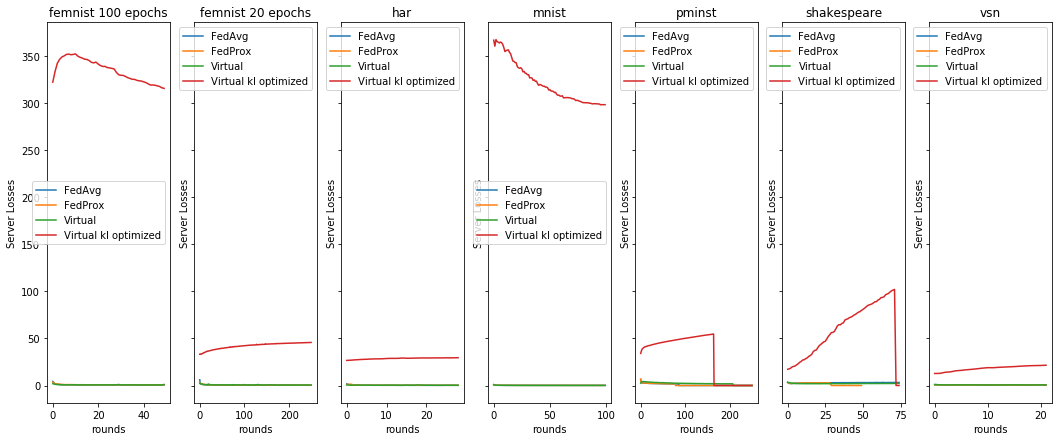

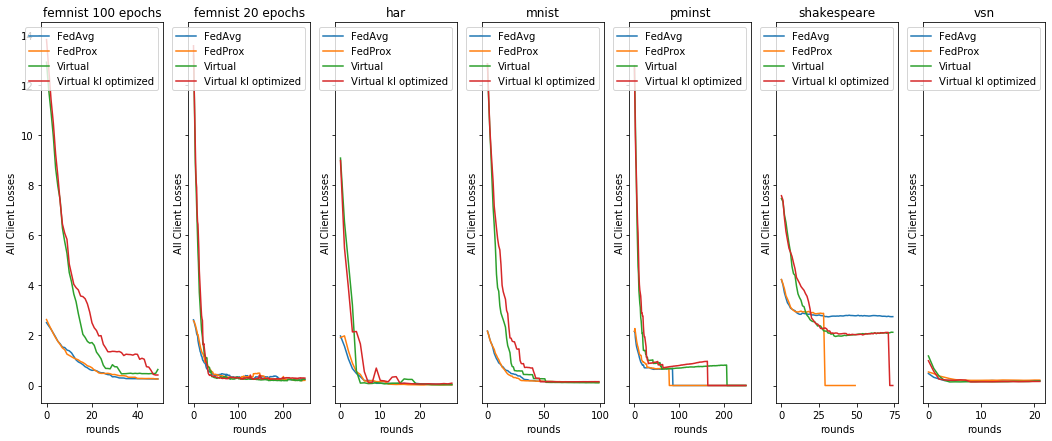

In [47]:
for i, metric in enumerate(metrics):
    f, axes = plt.subplots(1, len(folders.keys()), sharey=True, figsize=(18, 7))
    for j, dataset in enumerate(folders.items()):
        for k, mod in enumerate(dataset[1]):
            curve_file = str((root_folder / dataset[0] / mod) / metric) + ".npy"
            curve = np.load(curve_file)  # Load file
            plot_curves(axes[j], curve, 
                name=pretty_names[k], 
                title=dataset_names[j], 
                ylabel=" ".join(metric.split("_")).title())